IQR ppt code

               date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.

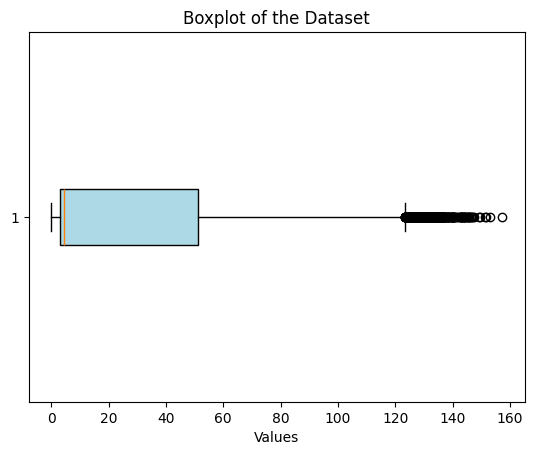

[ 3.2     4.57   51.2375]


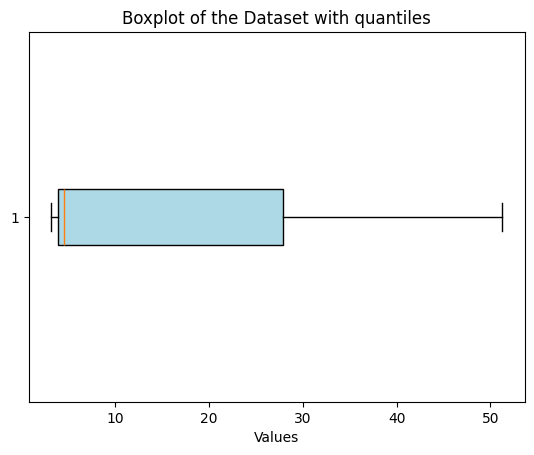

In [9]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load the dataset and print the data
data = pd.read_csv("Steel_industry_data.csv")
print(data.head())

#Considering one specific column
c_data = data["Usage_kWh"]
print(c_data)

#Plot a boxplot to view how the data is speard
plt.boxplot(c_data, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))

# Add labels and title
plt.title("Boxplot of the Dataset")
plt.xlabel("Values")

#Show the plot
plt.show()

#For finding the quantile of that particular column, we use numpy function
c_data_quantile = np.quantile(c_data,[0.25,0.50,0.75])
print(c_data_quantile)

#Visualisation form of the quantiles
#vert= makes the plot verticle, can be removed if we dont want that
#patch_artist: customisation of the color
plt.boxplot(c_data_quantile, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))

# Add labels and title
plt.title("Boxplot of the Dataset with quantiles")
plt.xlabel("Values")

# Show the plot
plt.show()

Isolation Forest ppt Code

Dataset loaded successfully!
               date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   


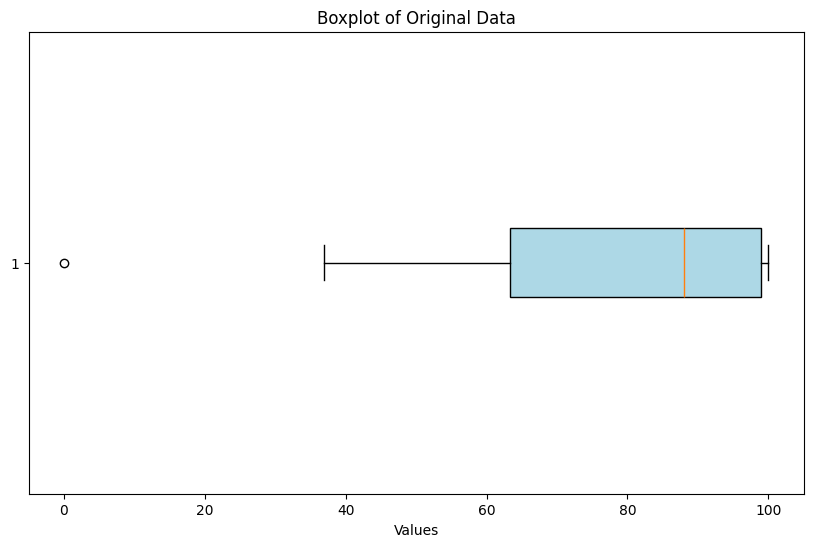

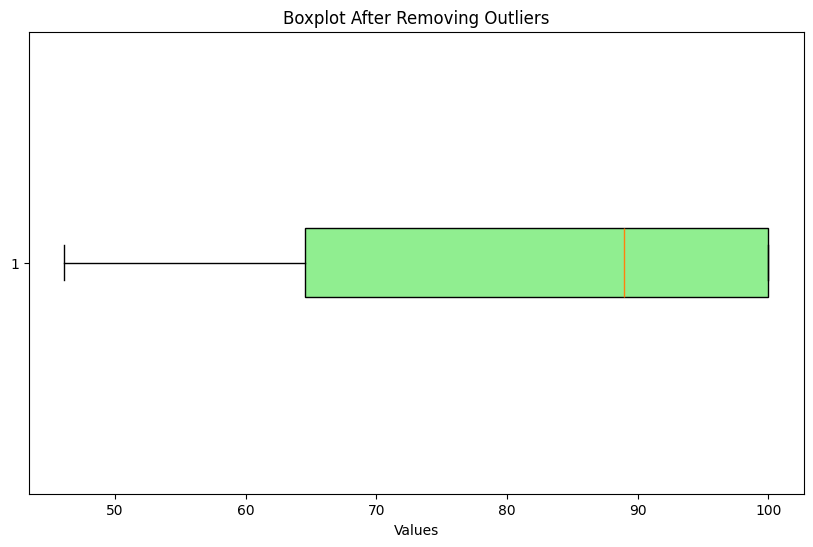

In [5]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

class IsolationForestDetector():
    def __init__(self, contamination=0.1, random_state=42):
        self.contamination = contamination
        self.random_state = random_state
        self.model = IsolationForest(contamination=contamination, random_state=random_state)
        self.data = None
        self.predictions = None
        self.column = None

    def load_data(self, file_path, column):
        df = pd.read_csv(file_path)
        print("Dataset loaded successfully!")
        print(df.head())
        #Select specific columns and convert to NumPy array
        self.data = df[column].values.reshape(-1,1)
        self.column =df[column]

    def fit(self):
        self.model.fit(self.data)
        print("Isolation Forest model trained.")

    def predict(self):
        self.predictions = self.model.predict(self.data)
        return self.predictions

    def anomaly_scores(self):
        scores = self.model.decision_function(self.data)
        return scores

    def visualize(self):

        inliers = self.column[self.predictions == 1]
        outliers = self.column[self.predictions == -1]
        
        # Plot boxplots for inliers and original data
        plt.figure(figsize=(10, 6))
        plt.boxplot(self.column, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
        plt.title("Boxplot of Original Data")
        plt.xlabel("Values")
        plt.show()

        # Boxplot after removing outliers
        plt.figure(figsize=(10, 6))
        plt.boxplot(inliers, vert=False, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
        plt.title("Boxplot After Removing Outliers")
        plt.xlabel("Values")
        plt.show()

# Example Usage
if __name__ == "__main__":
    # Initialize the detector
    o_detector = IsolationForestDetector(contamination=0.1)

    # Load a dataset (replace 'your_dataset.csv' with your actual dataset file)
    # Example: The dataset should have columns "Feature1" and "Feature2"
    o_detector.load_data("Steel_industry_data.csv", ["Lagging_Current_Power_Factor"])

    # Fit the model
    o_detector.fit()

    # Predict outliers
    predictions = o_detector.predict()
    print("Predictions (1: inlier, -1: outlier):")
    print(predictions)

    # Get anomaly scores
    scores = o_detector.anomaly_scores()
    print("Anomaly Scores:")
    print(scores)

    # Visualize the results
    o_detector.visualize()

----------------------------------------------------------------

IQR and Isolation Forest code under same class

Data without null values: 
                   date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0      01/01/2018 00:15       3.17                                  2.95   
1      01/01/2018 00:30       4.00                                  4.46   
2      01/01/2018 00:45       3.24                                  3.28   
3      01/01/2018 01:00       3.31                                  3.56   
4      01/01/2018 01:15       3.82                                  4.50   
...                 ...        ...                                   ...   
35035  31/12/2018 23:00       3.85                                  4.86   
35036  31/12/2018 23:15       3.74                                  3.74   
35037  31/12/2018 23:30       3.78                                  3.17   
35038  31/12/2018 23:45       3.78                                  3.06   
35039  31/12/2018 00:00       3.67                                  3.02   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0 

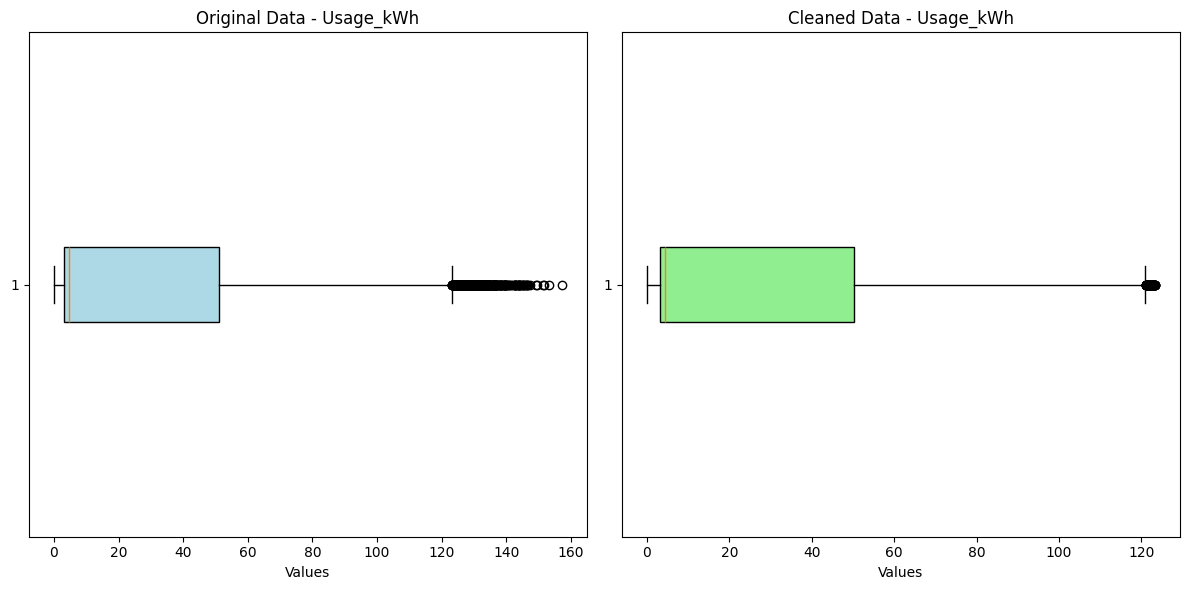

Outliers detected using Isolation Forest are: 
                   date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0      01/01/2018 00:15       3.17                                  2.95   
1      01/01/2018 00:30       4.00                                  4.46   
2      01/01/2018 00:45       3.24                                  3.28   
3      01/01/2018 01:00       3.31                                  3.56   
4      01/01/2018 01:15       3.82                                  4.50   
...                 ...        ...                                   ...   
35035  31/12/2018 23:00       3.85                                  4.86   
35036  31/12/2018 23:15       3.74                                  3.74   
35037  31/12/2018 23:30       3.78                                  3.17   
35038  31/12/2018 23:45       3.78                                  3.06   
35039  31/12/2018 00:00       3.67                                  3.02   

       Leading_Current_Reactive_Power_kV

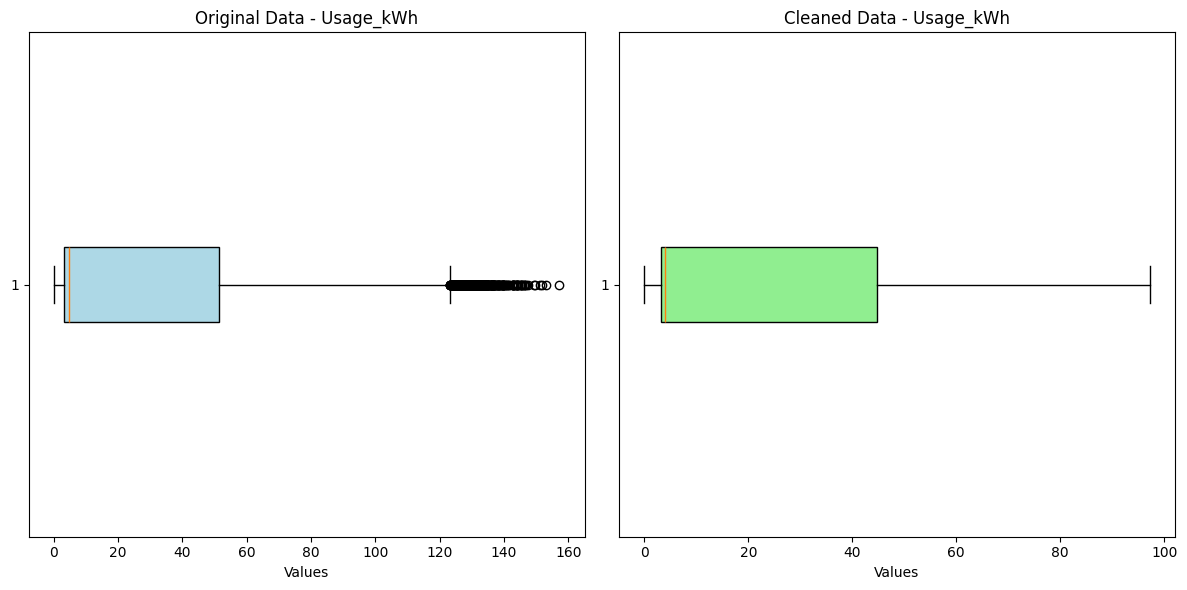

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

class OutlierDetection:
    def __init__(self, data, column_name):
        self.data = data
        self.column_name = column_name

    def remove_null_values(self):
        # Remove rows with null values in the specified column
        self.data = self.data.dropna(subset=[self.column_name])
        return self.data

    def detect_outliers_iqr(self):
        column_data = self.data[self.column_name]
        Q1 = column_data.quantile(0.25)
        Q3 = column_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_data = self.data[(column_data >= lower_bound) & (column_data <= upper_bound)]
        return cleaned_data
        

    def detect_outliers_isolation_forest(self, contamination=0.1):
        #contamination: Proportion of outliers in the dataset (default: 0.1).
        column_data = self.data[self.column_name].values.reshape(-1, 1)
        i_forest = IsolationForest(contamination=contamination, random_state=42)
        i_forest.fit(column_data)
        predictions = i_forest.predict(column_data)  # 1 for inliers, -1 for outliers
        cleaned_data = self.data[predictions == 1]
        return cleaned_data

    def plot_data(self, cleaned_data):
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))

        # Original Data
        axes[0].boxplot(self.data[self.column_name], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
        axes[0].set_title(f"Original Data - {self.column_name}")
        axes[0].set_xlabel("Values")

        # Cleaned Data
        axes[1].boxplot(cleaned_data[self.column_name], vert=False, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
        axes[1].set_title(f"Cleaned Data - {self.column_name}")
        axes[1].set_xlabel("Values")

        plt.tight_layout()
        plt.show()


# Example Usage
if __name__ == "__main__":
    # Load the dataset
    data = pd.read_csv("Steel_industry_data.csv")
    

    # Initialize the OutlierVisualizer
    column_name = "Usage_kWh"  # Replace with the column name you want to analyze
    visualizer = OutlierDetection(data, column_name)

    data_n =visualizer.remove_null_values()
    print("Data without null values: ")
    print(data_n)
    
    # Detect outliers using the IQR method
    cleaned_data_iqr = visualizer.detect_outliers_iqr()
    print("Outliers detected using IQR are: ")
    print(cleaned_data_iqr)

    # Visualize original and cleaned data
    print("Visualizing data after IQR-based outlier removal...")
    visualizer.plot_data(cleaned_data_iqr)

    # Detect outliers using Isolation Forest
    cleaned_data_if = visualizer.detect_outliers_isolation_forest(contamination=0.1)
    print("Outliers detected using Isolation Forest are: ")
    print(cleaned_data_if)

    # Visualize original and cleaned data
    print("Visualizing data after Isolation Forest-based outlier removal...")
    visualizer.plot_data(cleaned_data_if)
